# Early Stopping in Practice

This is a notebook for the medium article [Early Stopping in Practice](https://towardsdatascience.com/a-practical-introduction-to-early-stopping-in-machine-learning-550ac88bc8fd)

Please check out article for instructions

**License**: [BSD 2-Clause](https://opensource.org/licenses/BSD-2-Clause)

**load_iris is a function from sklearn.**

 It loads the iris dataset into the Vertica database.

 The iris dataset is a classic and easy multi-class classification dataset.

 It's ideal for classification and clustering functions.

**Here's how to load an iris dataset as a Dataframe in Python:**

Import the load_iris function from sklearn

Load the iris dataset into the iris variable using the load_iris() function

Create a pandas dataframe df using the iris data

**The iris dataset contains:**

Three classes: Setosa, Versicolor, and Virginica
50 patterns in each class
Four features: sepal length, sepal width, petal length, and petal width
150 records under five attributes: sepal length, sepal width, petal length, petal width, and species

In [45]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

## Exploring Data

In [46]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

In [48]:
label = pd.get_dummies(df['label'])
label

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [49]:
label.columns = ['label_' + str(x) for x in label.columns]
label.columns

Index(['label_setosa', 'label_versicolor', 'label_virginica'], dtype='object')

In [50]:
df = pd.concat([df, label], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [51]:
df.drop(['label'], axis=1, inplace=True)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [52]:
# label -> one-hot encoding
#label = pd.get_dummies(df['label'])
#label.columns = ['label_' + str(x) for x in label.columns]
#df = pd.concat([df, label], axis=1)

# drop old label
#df.drop(['label'], axis=1, inplace=True)

In [53]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [54]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [55]:
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [56]:
y[:3]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [57]:
X.shape, y.shape

((150, 4), (150, 3))

In [58]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

In [59]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

## Build a neural network

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [61]:
model = create_model()

In [62]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

**The validation_split argument in TensorFlow allows you to automatically reserve part of your training data for validation. This data is not used to train the model, but it is used to evaluate the model during training. This can help you to identify potential problems with the model, such as overfitting or underfitting.**

The validation_split argument is a float between 0 and 1. The value specifies the fraction of the training data that will be used for validation. For example, if you set validation_split=0.25, then 25% of the training data will be used for validation and 75% of the training data will be used for training.
The validation_split argument is a useful tool for evaluating your model during training. It can help you to identify potential problems with the model and to make sure that the model is generalizing well to unseen data.**

In [63]:
# Fit the model to the training data
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/200
3/3 - 2s - loss: 1.0646 - accuracy: 0.3333 - val_loss: 1.0282 - val_accuracy: 0.2857 - 2s/epoch - 587ms/step
Epoch 2/200
3/3 - 0s - loss: 1.0004 - accuracy: 0.3333 - val_loss: 0.9723 - val_accuracy: 0.2857 - 57ms/epoch - 19ms/step
Epoch 3/200
3/3 - 0s - loss: 0.9417 - accuracy: 0.4524 - val_loss: 0.8866 - val_accuracy: 0.6429 - 42ms/epoch - 14ms/step
Epoch 4/200
3/3 - 0s - loss: 0.8626 - accuracy: 0.7024 - val_loss: 0.7859 - val_accuracy: 0.7143 - 39ms/epoch - 13ms/step
Epoch 5/200
3/3 - 0s - loss: 0.7660 - accuracy: 0.6667 - val_loss: 0.6792 - val_accuracy: 0.7143 - 43ms/epoch - 14ms/step
Epoch 6/200
3/3 - 0s - loss: 0.6663 - accuracy: 0.6786 - val_loss: 0.5764 - val_accuracy: 0.8929 - 40ms/epoch - 13ms/step
Epoch 7/200
3/3 - 0s - loss: 0.5741 - accuracy: 0.8333 - val_loss: 0.4668 - val_accuracy: 0.7857 - 41ms/epoch - 14ms/step
Epoch 8/200
3/3 - 0s - loss: 0.4876 - accuracy: 0.7143 - val_loss: 0.3998 - val_accuracy: 0.7500 - 43ms/epoch - 14ms/step
Epoch 9/200
3/3 - 0s - lo

In [64]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

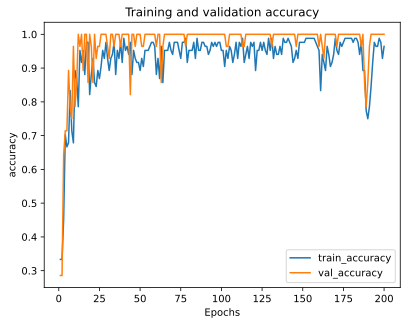

In [65]:
plot_metric(history, 'accuracy')

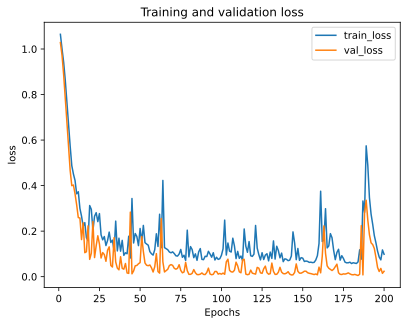

In [66]:
plot_metric(history, 'loss')

### EarlyStopping() with default settings

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

In [68]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.2937 - accuracy: 0.8571 - val_loss: 0.0507 - val_accuracy: 0.9643 - 123ms/epoch - 41ms/step
Epoch 2/200
3/3 - 0s - loss: 0.2893 - accuracy: 0.8452 - val_loss: 0.0272 - val_accuracy: 1.0000 - 78ms/epoch - 26ms/step
Epoch 3/200
3/3 - 0s - loss: 0.1718 - accuracy: 0.9048 - val_loss: 0.0465 - val_accuracy: 1.0000 - 83ms/epoch - 28ms/step


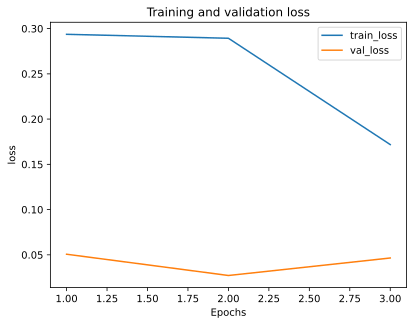

In [69]:
plot_metric(history, 'loss')

### Customizing Early Stopping

In [70]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=8,
    min_delta=0.001,
    mode='max'
)

In [71]:
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    validation_split=0.25,
    batch_size=40,
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.1061 - accuracy: 0.9524 - val_loss: 0.0806 - val_accuracy: 1.0000 - 115ms/epoch - 38ms/step
Epoch 2/200
3/3 - 0s - loss: 0.1147 - accuracy: 0.9643 - val_loss: 0.0754 - val_accuracy: 1.0000 - 62ms/epoch - 21ms/step
Epoch 3/200
3/3 - 0s - loss: 0.1031 - accuracy: 0.9643 - val_loss: 0.0394 - val_accuracy: 1.0000 - 53ms/epoch - 18ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0793 - accuracy: 0.9762 - val_loss: 0.0194 - val_accuracy: 1.0000 - 71ms/epoch - 24ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0898 - accuracy: 0.9762 - val_loss: 0.0133 - val_accuracy: 1.0000 - 81ms/epoch - 27ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0710 - accuracy: 0.9762 - val_loss: 0.0185 - val_accuracy: 1.0000 - 73ms/epoch - 24ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0759 - accuracy: 0.9643 - val_loss: 0.0229 - val_accuracy: 1.0000 - 63ms/epoch - 21ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0855 - accuracy: 0.9524 - val_loss: 0.0122 - val_accuracy: 1.0000 - 79ms/epoch - 26ms/step
Epoch 9/200
3/3 - 0s - 

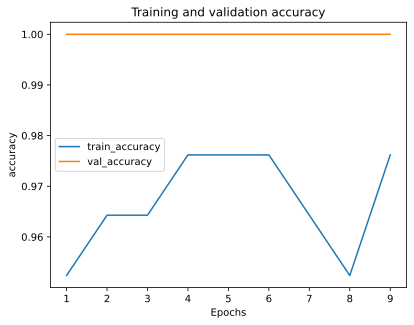

In [73]:
plot_metric(history, 'accuracy')